In [1]:
import requests
import json
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
FS = 16
import seaborn as sns
sns.set(style='ticks')

In [2]:
plt.style.use('fivethirtyeight')

# Football-data.org
I can use this API to get a list of all teams and players in the 2018 World Cup

In [52]:
# Get a list of all teams in the 2018 World Cup
uri = "http://api.football-data.org/v1/competitions/467/teams"
response = requests.get(uri)
assert response.status_code == 200, "Error in API request."
team_data = response.json()

In [64]:
# Get player data for each team in the 2018 World Cup
# soccer_data = []
num_teams = team_data['count']
for n,team in enumerate(team_data['teams']):
    print("({n}/{total}) {name}".format(n=n+1, total=num_teams, name=team['name']))    
    try:
        response = requests.get(team['_links']['players']['href'])
        assert response.status_code == 200, "Error in API request ({}).".format(n)
        team['players'] = response.json()
        soccer_data.append(team)    
    except Exception as e:
        print("Football-data Error: {error}".format(error=e))
    time.sleep(5)
    
# Save the data
print("Saving the data...", end="", flush=True)
with open('soccer_teams.json', 'w') as outfile:
    json.dump(soccer_data, outfile)
print(" Done.")

(1/32) Russia
(2/32) Saudi Arabia
(3/32) Egypt
(4/32) Uruguay
(5/32) Morocco
(6/32) Iran
(7/32) Portugal
(8/32) Spain
(9/32) France
(10/32) Australia
(11/32) Argentina
(12/32) Iceland
(13/32) Peru
(14/32) Denmark
(15/32) Croatia
(16/32) Nigeria
(17/32) Costa Rica
(18/32) Serbia
(19/32) Germany
(20/32) Mexico
(21/32) Brazil
(22/32) Switzerland
(23/32) Sweden
(24/32) Korea Republic
(25/32) Belgium
(26/32) Panama
(27/32) Tunisia
(28/32) England
(29/32) Colombia
(30/32) Japan
(31/32) Poland
(32/32) Senegal
Saving the data... Done.


In [72]:
player_count = 0
for team in soccer_data:
    print("-"*50 + '\n' + team['name'])
    for player in team['players']['players']:
        print(player['name'])
        player_count += 1
        
print("Total players: {}".format(player_count))

--------------------------------------------------
Russia
Denis Cheryshev
Ilya Kutepov
Roman Zobnin
Aleksandr Samedov
Igor Akinfeev
Sergey Ignashevich
Mário Fernandes
Alan Dzagoev
Aleksandr Golovin
Andrey Lunev
Vladimir Gabulov
Andrey Semenov
Vladimir Granat
Fedor Kudryashov
Igor Smolnikov
Daler Kuzyaev
Yuri Gazinskiy
Anton Miranchuk
Yuri Zhirkov
Aleksey Miranchuk
Aleksandr Erokhin
Fedor Smolov
Artem Dzyuba
--------------------------------------------------
Saudi Arabia
Yahya Al-Shehri
Fahad Al-Muwallad
Salem Al-Dawsari
Mohammed Al-Owais
Yasser Al-Mosailem
Abdullah Al-Muaiouf
Assaf Al Qarni
Motaz Hawsawi
Mohammed Jahfali
Omar Hawsawi
Osama Hawsawi
Ali Al-Boleahi
Yasir Al-Shahrani
Mansour Al-Harbi
Mohammed Al-Burayk
Saeed Al-Mowalad
Abdullah Ateef
Abdulmalek Al-Khaibri
Abdullah Al-Khaibari
Salman Al-Faraj
Hussein Al Moghawi
Taisir Al-Jassim
Mohamed Kanu
Nawaf Al-Abed
Hattan Bahbir
Mohammed Al-Kuwaykibi
Muhannad Asiri
Mohammed Al-Sahlawi
--------------------------------------------------

# SportRadar API

In [3]:
from sportradar import Soccer
# Load the API credentials
with open("secrets_sportradar.txt",'r') as f:
    soccer_api_key = f.readlines()[0].split(': ')[1].strip()

### Scrape data from the SportRadar API

In [4]:
# Create an instance of the Sportradar Soccer API class
sr = Soccer.Soccer(soccer_api_key)

In [6]:
# Get a list of all tournaments
tournaments = sr.get_tournaments().json()

# Get info on the 2018 World Cup (Teams, Rounds, etc.)
worldcup = sr.get_tournament_info(tournaments['tournaments'][4]['id']).json()

# Get more information on each team in the World Cup
teams = []
team_counter = 0
for group in worldcup['groups']:
    for team in group['teams']:
        team_counter += 1
        team_id = team['id']
        team_name = team['name']
        print("({}): {}, {}".format(team_counter, team_name, team_id))
        try:
            teams.append(sr.get_team_profile(team_id).json())
        except Exception as e:
            print("Error: {}".format(e))
        time.sleep(2) # wait 2 seconds before next API call

soccer-t3/intl/en/tournaments
http://api.sportradar.us/soccer-t3/intl/en/tournaments.json
soccer-t3/intl/en/tournaments/sr:tournament:16/info
http://api.sportradar.us/soccer-t3/intl/en/tournaments/sr:tournament:16/info.json
(1): Russia, sr:competitor:4694
soccer-t3/intl/en/teams/sr:competitor:4694/profile
http://api.sportradar.us/soccer-t3/intl/en/teams/sr:competitor:4694/profile.json
(2): Uruguay, sr:competitor:4725
soccer-t3/intl/en/teams/sr:competitor:4725/profile
http://api.sportradar.us/soccer-t3/intl/en/teams/sr:competitor:4725/profile.json
(3): Egypt, sr:competitor:4758
soccer-t3/intl/en/teams/sr:competitor:4758/profile
http://api.sportradar.us/soccer-t3/intl/en/teams/sr:competitor:4758/profile.json
(4): Saudi Arabia, sr:competitor:4834
soccer-t3/intl/en/teams/sr:competitor:4834/profile
http://api.sportradar.us/soccer-t3/intl/en/teams/sr:competitor:4834/profile.json
(5): Portugal, sr:competitor:4704
soccer-t3/intl/en/teams/sr:competitor:4704/profile
http://api.sportradar.us/socc

In [7]:
# Save the team data to a .json file
print("Saving the data...", end="", flush=True)
with open("final_world_cup_data.json", "w") as outfile:
    json.dump(teams, outfile)
print(" Done.")

Saving the data... Done.


## Get the match timeline for each match of the World Cup

In [46]:
world_cup_id = tournaments['tournaments'][4]['id']
matches = sr.get_tournament_results(world_cup_id).json()

soccer-t3/intl/en/tournaments/sr:tournament:16/results
http://api.sportradar.us/soccer-t3/intl/en/tournaments/sr:tournament:16/results.json


In [71]:
match_id = results['results'][0]['sport_event']['id']

In [99]:
num_total = len(matches['results'])
timelines = []
for n,match in enumerate(matches['results']):
    c = match['sport_event']['competitors']
    print('({n}/{t}) | {t1} vs. {t2}'.format(n=n,t=num_total, t1=c[0]['name'], t2=c[1]['name']))
    
    match_id = match['sport_event']['id']
    try:
        timeline = sr.get_match_timeline(match_id).json()
        timelines.append(timeline)
    except Exception as e:
        print("Error: {e} ({n})".format(e=e,n=n))
    
    time.sleep(2)

(0/64) | Russia vs. Saudi Arabia
soccer-t3/intl/en/matches/sr:match:13245886/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13245886/timeline.json
(1/64) | Egypt vs. Uruguay
soccer-t3/intl/en/matches/sr:match:13245922/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13245922/timeline.json
(2/64) | Morocco vs. Iran
soccer-t3/intl/en/matches/sr:match:13245916/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13245916/timeline.json
(3/64) | Portugal vs. Spain
soccer-t3/intl/en/matches/sr:match:13245872/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13245872/timeline.json
(4/64) | France vs. Australia
soccer-t3/intl/en/matches/sr:match:13245962/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13245962/timeline.json
(5/64) | Argentina vs. Iceland
soccer-t3/intl/en/matches/sr:match:13246014/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13246014/timeline.json
(6/64) | 

(50/64) | Spain vs. Russia
soccer-t3/intl/en/matches/sr:match:13307977/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13307977/timeline.json
(51/64) | Croatia vs. Denmark
soccer-t3/intl/en/matches/sr:match:13307981/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13307981/timeline.json
(52/64) | Brazil vs. Mexico
soccer-t3/intl/en/matches/sr:match:13307967/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13307967/timeline.json
(53/64) | Belgium vs. Japan
soccer-t3/intl/en/matches/sr:match:13307973/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13307973/timeline.json
(54/64) | Sweden vs. Switzerland
soccer-t3/intl/en/matches/sr:match:13307987/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13307987/timeline.json
(55/64) | Colombia vs. England
soccer-t3/intl/en/matches/sr:match:13307991/timeline
http://api.sportradar.us/soccer-t3/intl/en/matches/sr:match:13307991/timeline.json
(56/64)

In [123]:
# Save the team data to a .json file
print("Saving the data...", end="", flush=True)
with open("./data/world_cup_match_timelines.json", "w") as outfile:
    json.dump(timelines, outfile)
print(" Done.")

Saving the data... Done.


### Get the ID of each player that scored in the World Cup

In [2]:
timelines = json.load(open('./data/world_cup_match_timelines.json','rb'))

In [3]:
player_ids = []
player_goals = {}
for tl in timelines:
    stats = tl['statistics']
    
    # Find the goals for the current match
    for team in stats['teams']:
        for player in team['players']:
            if player['goals_scored'] > 0:
                id_ = player['id']
                player_ids.append(id_)
                if id_ in player_goals:
                    player_goals[id_] += player['goals_scored']
                else:
                    player_goals[id_] = player['goals_scored']
                

In [4]:
# Golden boot
for p,g in player_goals.items():
    if g==6:
        print(p)

sr:player:108579


In [121]:
p = sr.get_player_profile('sr:player:108579').json()

soccer-t3/intl/en/players/sr:player:108579/profile
http://api.sportradar.us/soccer-t3/intl/en/players/sr:player:108579/profile.json


In [122]:
p

{'generated_at': '2018-07-16T01:11:27+00:00',
 'schema': 'http://schemas.sportradar.com/bsa/soccer/v1/json/endpoints/soccer/player_profile.json',
 'player': {'id': 'sr:player:108579',
  'name': 'Kane, Harry',
  'first_name': 'Harry',
  'last_name': 'Kane',
  'type': 'forward',
  'date_of_birth': '1993-07-28',
  'nationality': 'England',
  'country_code': 'ENG',
  'height': 188,
  'weight': 89,
  'preferred_foot': 'right',
  'gender': 'male'},
 'teams': [{'id': 'sr:competitor:33',
   'name': 'Tottenham Hotspur',
   'country': 'England',
   'country_code': 'ENG',
   'abbreviation': 'TOT'},
  {'id': 'sr:competitor:4713',
   'name': 'England',
   'country': 'England',
   'country_code': 'ENG',
   'abbreviation': 'ENG'}],
 'roles': [{'type': 'on_loan',
   'active': 'false',
   'team': {'id': 'sr:competitor:25',
    'name': 'Millwall FC',
    'country': 'England',
    'country_code': 'ENG',
    'abbreviation': 'MIL'},
   'start_date': '2012-01-01',
   'end_date': '2012-05-31',
   'jersey_num

In [112]:
# How many players scored in the World Cup?
len(player_ids)

143

In [70]:
match['statistics']

{'teams': [{'id': 'sr:competitor:4694',
   'name': 'Russia',
   'abbreviation': 'RUS',
   'qualifier': 'home',
   'statistics': {'ball_possession': 41,
    'free_kicks': 11,
    'throw_ins': 30,
    'corner_kicks': 6,
    'fouls': 22,
    'shots_blocked': 3,
    'shots_on_target': 7,
    'offsides': 3,
    'goal_kicks': 4,
    'shots_off_target': 3,
    'injuries': 1,
    'yellow_cards': 1},
   'players': [{'id': 'sr:player:13274',
     'name': 'Akinfeev, Igor',
     'substituted_in': 0,
     'substituted_out': 0,
     'goals_scored': 0,
     'assists': 0,
     'own_goals': 0,
     'yellow_cards': 0,
     'yellow_red_cards': 0,
     'red_cards': 0},
    {'id': 'sr:player:146393',
     'name': 'Fernandes, Mario',
     'substituted_in': 0,
     'substituted_out': 0,
     'goals_scored': 0,
     'assists': 0,
     'own_goals': 0,
     'yellow_cards': 0,
     'yellow_red_cards': 0,
     'red_cards': 0},
    {'id': 'sr:player:13303',
     'name': 'Ignashevich, Sergey',
     'substituted_in'

## TODO: Distribution of positions of players that scored

### Women's World Cup

In [23]:
# Create an instance of the SportRadar API class
sportsradar = SportRadarAPI(soccer_api_key)

# Get a list of all tournaments
tournaments = sportsradar.get_tournaments().json()

# Get info on the 2018 World Cup (Teams, Rounds, etc.)
worldcup = sportsradar.get_tournament_info(tournaments['tournaments'][14]['id']).json()

# Get more information on each team in the World Cup
teams = []
team_counter = 0
for group in worldcup['groups']:
    for team in group['teams']:
        team_counter += 1
        team_id = team['id']
        team_name = team['name']
        print("({}): {}, {}".format(team_counter, team_name, team_id))
        try:
            teams.append(sportsradar.get_team_profile(team_id).json())
        except Exception as e:
            print("Error: {}".format(e))
        time.sleep(5) # wait 5 seconds before next API call
        
# Save the team data to a .json file
print("Saving the data...", end="", flush=True)
with open("world_cup_womens_team_data.json", "w") as outfile:
    json.dump(teams, outfile)
print(" Done.")

---
---
# Load the World Cup team data

In [5]:
# teams = json.loads(open("world_cup_team_data.json", "r").read())
# teams = json.loads(open("world_cup_womens_team_data.json", "r").read())
teams = json.loads(open("./data/final_world_cup_data.json", "r").read())
teams[23]['team']['name'] = 'South Korea'
teams[23]['team']['country'] = 'South Korea'
# teams[17]['team']['name'] = 'South Korea'
# teams[17]['team']['country'] = 'South Korea'
# Combine all player data into a single list
players = [[p for p in team['players']] for team in teams]
players = [item for sublist in players for item in sublist]

# Create a DataFrame from the list of players
df = pd.DataFrame(players)
df['weight_lbs'] = df.weight*2.20462
df['height_ft'] = df.height*0.03280841666667
# df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df.at[df.nationality=="Republic of Korea", 'nationality'] = "South Korea"
df.head()

country_code date_of_birth gender  height                id  jersey_number  \
0          RUS    1986-04-08   male     185   sr:player:13274              1   
1          RUS    1990-09-19   male     187  sr:player:146393              2   
2          RUS    1993-07-29   male     190   sr:player:94759              3   
3          RUS    1979-07-14   male     186   sr:player:13303              4   
4          RUS    1989-03-24   male     191   sr:player:84767              5   

                  name nationality nickname preferred_foot        type  \
0       Akinfeev, Igor      Russia      NaN          right  goalkeeper   
1     Fernandes, Mario      Russia      NaN          right    defender   
2        Kutepov, Ilya      Russia      NaN          right    defender   
3  Ignashevich, Sergey      Russia      NaN          right    defender   
4      Semenov, Andrey      Russia      NaN          right    defender   

   weight  weight_lbs  height_ft  
0      83   182.98346   6.069557  
1      79   174.16498   6.135174  
2      82   180.77884   6.233599  
3      84   185.18808   6.102366  
4      87   191.80194   6.266408

---
---
# Analysis - Box plots of player heights and weights

In [6]:
jersey_colors = dict(zip([team['team']['country'] for team in teams],[team['jerseys'][0] for team in teams]))

### Player heights

### Heights plotted by nationality

Text(1,4.95,'@johnwmillr')

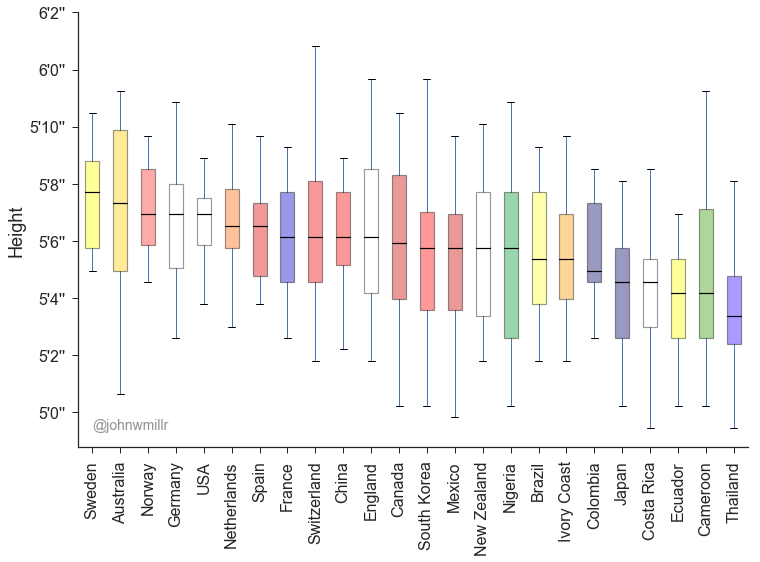

In [26]:
# https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values/37871635#37871635
grouped = df.groupby(["nationality"])
df2 = pd.DataFrame({col:vals['height_ft'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

boxprops = dict(linestyle='-', linewidth=1, color='black')
whiskerprops = dict(linestyle='-',linewidth=1, color='black')
bps = df2.boxplot(rot=90, figsize=(12,8),
           grid=False, boxprops=boxprops, whiskerprops=whiskerprops, showfliers=False,
                  notch=False, patch_artist=True, return_type='dict')

# Touch up the plot
ax = plt.gca()

# Change color of each box
n = 0
for patch_box, patch_med in zip(bps['boxes'], bps['medians']):    
    patch_box.set_facecolor("#" + jersey_colors[meds.index[n]]['base'])    
    patch_box.set_edgecolor("k")    
    patch_box.set_linewidth(1.2)
    patch_box.set_alpha(0.4)
    patch_med.set_color("k")
    patch_med.set_linewidth(1.2)    
    n += 1

ax.set_ylabel("Height", fontsize=FS+2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 

# yticks = np.arange(5.5,6.6,2/12)
yticks = np.arange(5.0,6.2,2/12)
pprint_feet = lambda x: "{ft}'{inch:1.0f}''".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))))
ax.set_yticks(yticks)
ax.set_yticklabels(map(pprint_feet, yticks))

x = np.array(ax.get_xlim())
mid = x.sum()-x.mean()
title = "Distributions of height for each team in the 2018 FIFA World Cup"
# ax.text(mid, 6.6, title, fontsize=FS, horizontalalignment='center', weight='bold')     
# ax.text(1, 5.4, "@johnwmillr", fontsize=FS-2, alpha=0.5)
ax.text(1, 4.95, "@johnwmillr", fontsize=FS-2, alpha=0.5)
# plt.savefig("./figures/nations_by_height_no_title.png", format="png", dpi=300, bbox_inches="tight")

### Heights plotted by position

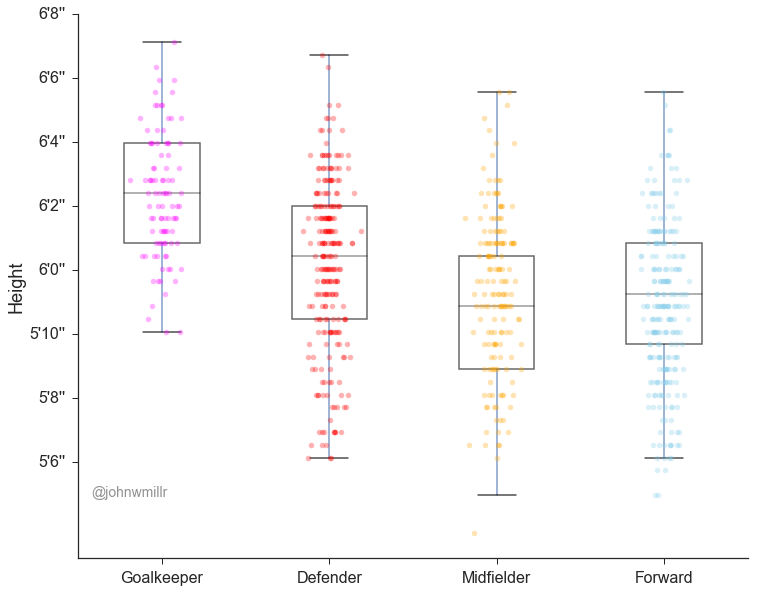

In [131]:
# https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values/37871635#37871635
grouped = df.groupby(["type"])
df2 = pd.DataFrame({col:vals['height_ft'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
# df2 = df2[meds.index]
df2 = df2[pd.Index(['goalkeeper','defender','midfielder','forward'])]

boxprops = dict(linestyle='-', linewidth=1, color='k')
whiskerprops = dict(linestyle='-',linewidth=1, color='k')
bps = df2.plot.box(rot=0, figsize=(12,10),
           grid=False, boxprops=boxprops, whiskerprops=whiskerprops, showfliers=False,
                  notch=False, patch_artist=True, return_type='dict')

# Touch up the plot
ax = plt.gca()

# Change color of each box
n = 0
lw = 1.5
colors = 4*['w']
for patch_box, patch_med in zip(bps['boxes'], bps['medians']):
    patch_box.set_facecolor(colors[n])
    patch_box.set_edgecolor("k")    
    patch_box.set_alpha(0.6)
    patch_med.set_color("k")
    patch_box.set_linewidth(lw)
    patch_med.set_linewidth(1.5)
    patch_med.set_alpha(0.4)
    n += 1

n = 0
a = 0.7
for patch_cap, patch_whisk in zip(bps['caps'], bps['whiskers']):
    patch_cap.set_linewidth(lw)
    patch_cap.set_alpha(a)
    patch_whisk.set_linewidth(lw)
    patch_whisk.set_alpha(a)
    n += 1    

# Add some random jitter to the x-axis
# colors = ['red','seagreen','orange','magenta']
colors = ['magenta','red','orange','skyblue']
# colors = 4*['k']
dots = []
for n,var in enumerate(meds.index):
    x = np.random.normal(n+1, 0.06, size=sum(df2[var].notna()))
    y = df2[var][df2[var].notna()]
    dots.append(plt.plot(x, y, '.', color=colors[n], alpha=0.3, markersize=11))

# Move the scatter plots on top of the box plots
[dot[0].set_zorder(20) for dot in dots]

ax.set_ylabel("Height", fontsize=FS+2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 

yticks = np.arange(5.5,6+8/12,2/12)
# yticks = np.arange(5.0,6.2,2/12)
pprint_feet = lambda x: "{ft}'{inch:.0f}''".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))))
# pprint_feet = lambda x: "{ft}'{inch:.0f}''           \n({cm:3.0f} cm)            ".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))), cm=x*30.48)
ax.set_yticks(yticks)
ax.set_yticklabels(map(pprint_feet, yticks), fontdict={"horizontalalignment": "right", "verticalalignment": "center"})
# ax.set_xticklabels(["Goalkeeper", "Defender", "Forward", "Midfielder"]);
ax.set_xticklabels(["Goalkeeper", "Defender", "Midfielder", "Forward"]);

x = np.array(ax.get_xlim())
mid = (x.sum()-x.mean())*0.94
title = "Distributions of height by position for each player in the 2018 FIFA World Cup"
# ax.text(mid, 6.75, title, fontsize=FS-3, horizontalalignment='center', weight='bold')     
ax.text(0.58, 5.41, "@johnwmillr", fontsize=FS-2, alpha=0.5);
# ax.text(0.58, 4.95, "@johnwmillr", fontsize=FS-2, alpha=0.5);
# plt.savefig("./figures/women_height_by_position_no_title.png", format="png", dpi=300, bbox_inches="tight")

## Plot of player positions, sized by goals

In [10]:
goals = np.array([val for val in player_goals.values()])

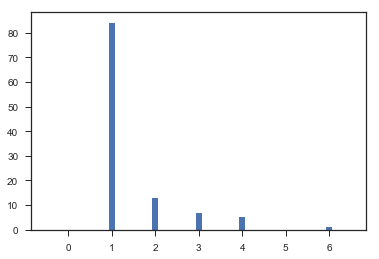

In [11]:
plt.hist(goals, bins=np.linspace(-0.5,6.5))
plt.show()

In [10]:
def getJerseyColor(country_code, type_='home'):
    n = 0 if type_=='home' else 1
    for team in teams:
        if country_code == team['team']['country_code']:
            return "#" + team['jerseys'][n]['base']
    return None        

goalkeeper
defender
midfielder
forward


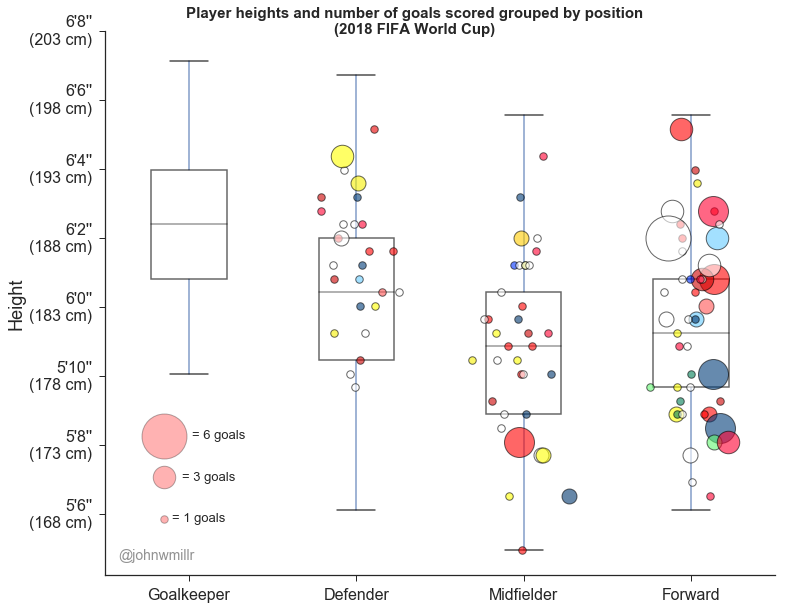

In [97]:
# https://stackoverflow.com/questions/21912634/how-can-i-sort-a-boxplot-in-pandas-by-the-median-values/37871635#37871635
grouped = df.groupby(["type"])
df2 = pd.DataFrame({col:vals['height_ft'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
# df2 = df2[meds.index]
df2 = df2[pd.Index(['goalkeeper','defender','midfielder','forward'])]

boxprops = dict(linestyle='-', linewidth=1, color='k')
whiskerprops = dict(linestyle='-',linewidth=1, color='k')
bps = df2.plot.box(rot=0, figsize=(12,10),
           grid=False, boxprops=boxprops, whiskerprops=whiskerprops, showfliers=False,
                  notch=False, patch_artist=True, return_type='dict')

# Touch up the plot
ax = plt.gca()

# Change color of each box
n = 0
lw = 1.5
colors = 4*['w']
for patch_box, patch_med in zip(bps['boxes'], bps['medians']):
    patch_box.set_facecolor(colors[n])
    patch_box.set_edgecolor("k")    
    patch_box.set_alpha(0.6)
    patch_med.set_color("k")
    patch_box.set_linewidth(lw)
    patch_med.set_linewidth(1.5)
    patch_med.set_alpha(0.4)
    n += 1

n = 0
a = 0.7
for patch_cap, patch_whisk in zip(bps['caps'], bps['whiskers']):
    patch_cap.set_linewidth(lw)
    patch_cap.set_alpha(a)
    patch_whisk.set_linewidth(lw)
    patch_whisk.set_alpha(a)
    n += 1    

# Add some random jitter to the x-axis
# colors = ['red','seagreen','orange','magenta']
colors = ['magenta','red','orange','skyblue']
# colors = 4*['k']
dots = []
for n,var in enumerate(df2.columns):
    print(var)
    for i,row in df.iterrows():
        if row['type'] == var:
            if row['id'] in player_goals:
                x = np.random.normal(n+1, 0.13)
                y = row['height_ft']
                ds = 15*player_goals[row['id']] # dot size
                
                # Color is jersey color               
                jersey_color = getJerseyColor(row['country_code'], type_='home')
                
                dots.append(plt.plot(x, y, '.', color=jersey_color, mec='k', mew=1, alpha=0.6, markersize=ds))
                
# Label the graph
goals = [1,3,6]
xx = len(goals)*[0.85]
yy = np.linspace(5.49, 5.69, len(goals))
jj = np.linspace(xx[0]+0.05,xx[0]+1.7*0.1, len(goals))
for x,y,g,j in zip(xx, yy, goals, jj):
    plt.plot(x, y, '.', color='r', mec='k', mew=1, alpha=0.3, markersize=g*15)
    if g == 1:
        ax.text(j, y, '= {} goal'.format(g), fontsize=FS-3, va='center')
    else:
        ax.text(j, y, '= {} goals'.format(g), fontsize=FS-3, va='center')

# Move the scatter plots on top of the box plots
[dot[0].set_zorder(20) for dot in dots]

ax.set_ylabel("Height", fontsize=FS+2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 

yticks = np.arange(5.5,6+8/12,2/12)
# yticks = np.arange(5.0,6.2,2/12)
# pprint_feet = lambda x: "{ft}'{inch:.0f}''".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))))
pprint_feet = lambda x: "{ft}'{inch:.0f}''\n({cm:3.0f} cm)".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))), cm=x*30.48)
ax.set_yticks(yticks)
ax.set_yticklabels(map(pprint_feet, yticks), fontdict={"horizontalalignment": "right", "verticalalignment": "center"})
ax.set_xticklabels(["Goalkeeper", "Defender", "Midfielder", "Forward"]);

x = np.array(ax.get_xlim())
mid = (x.sum()-x.mean())*0.94
title = "Player heights and number of goals scored grouped by position\n(2018 FIFA World Cup)"
ax.text(mid, 6.66, title, fontsize=FS-1, horizontalalignment='center', weight='bold')     
ax.text(0.58, 5.39, "@johnwmillr", fontsize=FS-2, alpha=0.5);
# ax.text(3.9, 6.62, "@johnwmillr", fontsize=FS-2, alpha=0.5);
# ax.text(0.58, 4.95, "@johnwmillr", fontsize=FS-2, alpha=0.5);
# plt.savefig("./figures/women_height_by_position_no_title.png", format="png", dpi=300, bbox_inches="tight")
# plt.savefig("./figures/men_height_by_position_goals_title.png", format="png", dpi=300, bbox_inches="tight")
# plt.show()

In [45]:
ax.get_xlim()

(0.5, 4.5)

In [229]:
df.loc[568]

country_code                   ENG
date_of_birth           1993-07-28
gender                        male
height                         188
id                sr:player:108579
jersey_number                    9
name                   Kane, Harry
nationality                England
nickname                       NaN
preferred_foot               right
type                       forward
weight                          89
weight_lbs                 196.211
height_ft                  6.16798
Name: 568, dtype: object

### Other method of making boxplots

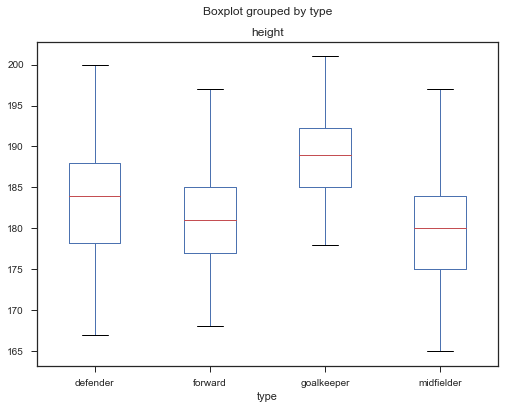

In [256]:
boxprops = dict(linestyle='-', linewidth=1, color='black')
whiskerprops = dict(linestyle='-',linewidth=1, color='black')
df.boxplot(column='height', by='type', rot=0, figsize=(8,6),
           grid=False, boxprops=boxprops, whiskerprops=whiskerprops, showfliers=False, notch=False)

## Weight vs height

In [8]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

Text(207,5.37,'@johnwmillr')

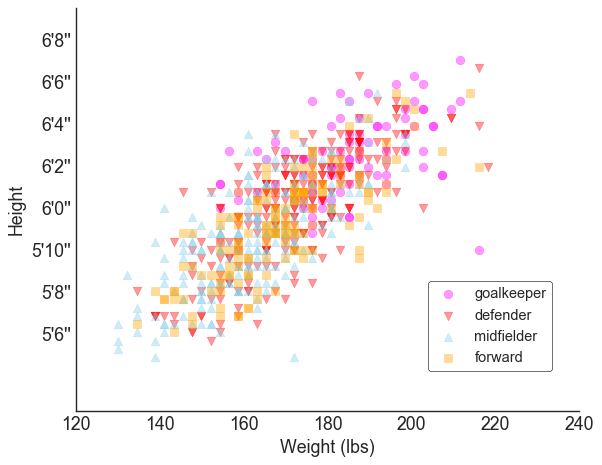

In [35]:
positions = list(set(df.type)) # ['defender', 'forward', 'midfielder', 'goalkeeper']
colors = ['magenta','orange','red','skyblue']
pal = dict(zip(positions,colors))
mrks = {"marker": ['o','v','^','s']}
fg = sns.FacetGrid(data=df, hue='type', palette=pal, aspect=2.5/2, size=6, hue_kws=mrks)
fg.map(plt.scatter, 'weight_lbs', 'height_ft', alpha=0.4, s=60)
# fg.map(sns.jointplot, 'weight_lbs', 'height_ft')
# fg.map(sns.regplot, 'weight_lbs', 'height_ft')

fg.set_xlabels("Weight (lbs)", fontsize=FS)
fg.set_ylabels("Height", fontsize=FS)
ax = plt.gca()

yticks = np.arange(5.5,6+8/12,2/12)
pprint_feet = lambda x: "{ft}'{inch:.0f}''".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))))
# pprint_feet = lambda x: "{ft}'{inch:.0f}''           \n({cm:3.0f} cm)            ".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))), cm=x*30.48)
ax.set_yticks(yticks)
ax.set_yticklabels(map(pprint_feet, yticks), fontdict={"horizontalalignment": "right", "verticalalignment": "center"})

# xticks = ax.get_xticks()
# pprint_weight = lambda x: "{lbs:.0f} (lbs)\n{kg:.0f} (kg)".format(lbs=x, kg=x*0.453592)
# ax.set_xticklabels(pprint_weight(xticks), fontdict={"horizontalalignment": "center"})

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 
ax.legend(loc=(0.7,0.1), frameon=True, facecolor='w', edgecolor='k', fontsize=FS-3, framealpha=1)
x = np.array(ax.get_xlim())
mid = x.sum()-x.mean()
title = "Height and weight of each player in the 2018 FIFA World Cup"
# ax.text(mid, 6.7, title, fontsize=FS, horizontalalignment='center', weight='bold')     
ax.text(207, 5.37, "@johnwmillr", fontsize=FS-2, alpha=0.5)
# fig = plt.gcf()
# fig.suptitle(title, weight = 'bold', size = 18, y = 1.05)

In [7]:
fg.savefig("./figures/height_vs_weight_by_position_v2_no_title.png", format="png", dpi=300, bbox_inches="tight")

## Birthdays

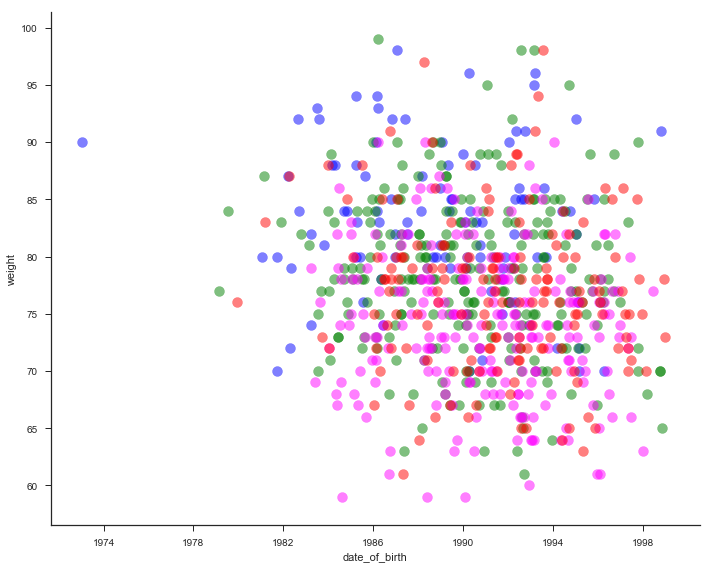

In [401]:
fg = sns.FacetGrid(data=df, hue='type', palette=pal, aspect=2.5/2, size=8, hue_kws=mrks)
fg.map(plt.scatter, 'date_of_birth', 'weight', alpha=0.5, s=100)

## Interactive plots

In [7]:
import mpld3
from mpld3 import plugins
# %matplotlib inline
mpld3.enable_notebook()

In [14]:
# Define some CSS to control our custom labels
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: center;
}
img
{
    border-radius: 8px;
    height: auto;        
}
center {
    display: block;
    margin-left: auto;
    margin-right: auto;
    width: 50%;
}
"""

## Boxplots of height by player position

In [20]:
# Group the height data by player position
grouped = df.groupby(["type"])
df2 = pd.DataFrame({col:vals['height_ft'] for col,vals in grouped})
df2 = df2[pd.Index(['goalkeeper','defender','midfielder','forward'])]

# Match the indices from the original DF to the grouped DF
old_df_indices = list(grouped.indices.values())
new_order=[2,0,3,1]
old_df_indices = [ old_df_indices[i] for i in new_order]
old_df_indices = [idx for sublist in old_df_indices for idx in sublist] # flatten the list

# Create the data tips
names = df.name
# imgs = ['<img src="{}" width="80">'.format(url) for url in all_images]
labels = []
cols_to_drop = ['country_code','gender','id','nickname','name','preferred_foot'] 
for i in old_df_indices:
    label = df.iloc[[i], :].T    
    label.columns = [names[i]]
#     html = label.drop([], axis=0).to_html() + '\n' + imgs[i]
    html = label.drop(cols_to_drop, axis=0).to_html()
    labels.append(html)
           
# --------------------------
# Do the actual plotting
bps = df2.boxplot(rot=0, figsize=(12,8), grid=False, showfliers=False, return_type='dict')
c,lw = 'k',2
plt.setp(bps['boxes'], color=c, linewidth=lw)
plt.setp(bps['caps'], color=c, linewidth=lw)
plt.setp(bps['whiskers'], color=c, linewidth=lw)
plt.setp(bps['medians'], color=c, linewidth=lw+.5)

fig, ax = plt.gcf(), plt.gca()

# Add some random jitter to the x-axis
colors = ['magenta','red','skyblue','orange']
dots = []
ms = 8
all_random_x = np.array([])
all_y = np.array([])
for n,var in enumerate(df2.columns.values):
    x = np.random.normal(n+1, 0.06, size=sum(df2[var].notna()))
    y = df2[var][df2[var].notna()]
    dots.append(plt.plot(x, y, 'o', color=colors[n], alpha=0.4, markersize=ms))

# all_ds = np.array([])
# for n,var in enumerate(df2.columns.values):
#     print(var)
#     for i,row in df.iterrows():
#         if row['type'] == var:
#             if row['id'] in player_goals:
#                 x = np.random.normal(n+1, 0.09)
#                 y = row['height_ft']
#                 ds = 15*player_goals[row['id']] # dot size
#                 all_ds = np.append(all_ds, ds)
                
#                 # Color is jersey color               
#                 jersey_color = getJerseyColor(row['country_code'], type_='home')
                
#                 dots.append(plt.plot(x, y, '.', color=jersey_color, mec='k', mew=1, alpha=0.7, markersize=ds))

    # Add the points we'll mouse over
    all_random_x = np.append(all_random_x, x)
    all_y = np.append(all_y, y)
                                
# Label the graph
goals = [1,3,6]
xx = len(goals)*[0.85]
yy = np.linspace(5.49, 5.69, len(goals))
jj = np.linspace(xx[0]+0.05,xx[0]+1.7*0.1, len(goals))
for x,y,g,j in zip(xx, yy, goals, jj):
    plt.plot(x, y, '.', color='r', mec='k', mew=1, alpha=0.3, markersize=g*15)
    if g == 1:
        ax.text(j, y, '= {} goal'.format(g), fontsize=FS-3, va='center')
    else:
        ax.text(j, y, '= {} goals'.format(g), fontsize=FS-3, va='center')                
        
# Move the scatter plots on top of the box plots
[dot[0].set_zorder(20) for dot in dots]

# Adjust the Y-tick labels
ax.set_ylabel("Height", fontsize=FS+4)
yticks = np.arange(5.5,6+8/12,2/12)
# yticks = np.arange(5.0,6.2,2/12)
# pprint_feet = lambda x: "{ft}'{inch:.0f}''".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))))
pprint_feet = lambda x: "{ft}'{inch:.0f}''           \n({cm:3.0f} cm)            ".format(ft=int(np.floor(x)), inch=round(12*(x-np.floor(x))), cm=x*30.48)
ax.set_yticks(yticks)
ax.set_yticklabels(map(pprint_feet, yticks), fontdict={"horizontalalignment": "right", "verticalalignment": "center"})
ax.set_xticklabels(["Goalkeeper", "Defender", "Midfielder", "Forward"], fontsize=FS);

ax.text(0.58, 4.95, "@johnwmillr", fontsize=FS, alpha=0.8);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FS) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS)

# https://mpld3.github.io/examples/html_tooltips.html
# points = []
# for i in np.arange(len(all_random_x)):
#     points.append(ax.plot(all_random_x[i], all_y[i], 'ko', mec='k', ms=all_ds[i], alpha=0.0, label=""))
points = ax.plot(all_random_x, all_y, 'ko', mec='k', ms=10, alpha=0.0, label="")
tooltip = plugins.PointHTMLTooltip(points[0], labels, voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)
[point.set_zorder(30) for point in points]

plotname = 'mpld3_women_{}_by_position'.format('height','score')
# mpld3.save_html(fig, './figures/'+plotname+'_test.html', figid=plotname, template_type='simple')
mpld3.display()

### Height vs. weight

In [5]:
# Create the data tips
names = df.name
# imgs = ['<img src="{}" width="80">'.format(url) for url in all_images]
labels = []
for i in range(len(df)):
    label = df.iloc[[i], :].T    
    label.columns = [names[i]]
#     html = label.drop([], axis=0).to_html() + '\n' + imgs[i]
    html = label.drop([], axis=0).to_html()
    labels.append(html)

# --------------------------
# Do the actual plotting
# Scatter plot the data
fig, ax = plt.subplots(figsize=(12,10))
ax.grid(True, alpha=0.3)

term1,term2 = 'weight_lbs','height_ft'

x,y = df[term1],df[term2]
b = []
ms = 10
b.append(plt.plot(x, y, 'ro', ms=ms, alpha=0.5))

# https://mpld3.github.io/examples/html_tooltips.html
points = ax.plot(df[term1], df[term2], 'ko', mec='k', ms=ms, alpha=0.0, label="") # Plot all of the data
tooltip = plugins.PointHTMLTooltip(points[0], labels, voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)

ax.set_xlabel(term1, fontsize=FS)
ax.set_ylabel(term2, fontsize=FS)
for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FS-2) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FS-2)
# ax.set_title("Pitchfork album review scores as a function of lexical diversity", fontsize=FS)
# ax.annotate("@johnwmillr", (0.2,.8), fontsize=FS-4, alpha=0.5)
# ax.legend(loc=(0.8,.2), frameon=True, facecolor='w', edgecolor='k', fontsize=FS-4, framealpha=0.4)
# ax.set_xlim([datetime.strptime('1984', '%Y'), datetime.strptime('2019', '%Y')])
# ax.set_ylim([-10, 250])

mpld3.display()
# plotname = 'mpld3_{}_vs_{}'.format('lexdiv','score')
# mpld3.save_html(fig, './figures/'+plotname+'.html', figid=plotname, template_type='simple')